# Automatic Recognition of Persuasive Content on Electronic News + Text Rank

https://colab.research.google.com/github/dipanjanS/nlp_workshop_odsc19/blob/master/Module05%20-%20NLP%20Applications/Project06%20-%20Text%20Summarization.ipynb

# Install Lib

In [1]:
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
!pip install nlp-id
!pip install transformers
from keras.preprocessing import sequence
import numpy as np
!pip install torch
!pip install tensorflow
!pip install bertviz
!pip install joblib
!pip install networkx==2.6.3

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Asiyah\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

# Init Data

In [2]:
pip list

Package                      Version
---------------------------- ------------
absl-py                      2.1.0
aiohttp                      3.9.5
aiosignal                    1.2.0
annotated-types              0.6.0
anyio                        4.2.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.3
bertviz                      1.4.0
bleach                       4.1.0
blinker                      1.6.2
blis                         0.7.9
boto3                        1.35.1
botocore                     1.35.1
Bottleneck                   1.3.7
Brotli                       1.0.9
cachetools                   5.3.3
catalogue                    2.0.10
certifi                      2024.7.4


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
from io import BytesIO

import requests
import pandas as pd

r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1i3BBozbnx9HSTkMsfMHChvzYwG_2MiFB06U05gitD8U&output=xlsx')
data = r.content
dataset = pd.read_excel(data, 'Prepocessed (3)')
dataset

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower,content_punct,content_lemma,content_token,content_stopwords
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...,absen online kini mulai merambah ke berbagai p...,absen online kini mulai rambah ke bagai usaha ...,"['absen', 'online', 'rambah', 'usaha', 'ganti'...",absen online rambah usaha ganti absen manual r...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...,sebelum mengetahui manfaat absen online bagi p...,belum tahu manfaat absen online bagi usaha mar...,"['manfaat', 'absen', 'online', 'usaha', 'mari'...",manfaat absen online usaha mari ajar erti lapo...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...,semua data tersebut selanjutnya akan diberikan...,semua data sebut lanjut akan beri kepada hrd y...,"['data', 'hrd', 'tanggung', 'gaji', 'karyawan'...",data hrd tanggung gaji karyawan data hrd rugi ...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...,setiap hari karyawan melakukan absen dengan me...,tiap hari karyawan laku absen dengan tulis jam...,"['karyawan', 'laku', 'absen', 'tulis', 'jam', ...",karyawan laku absen tulis jam hadir tanda tang...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen...","sementara, absen online merupakan sistem absen...",sementara absen online rupa sistem absensi yan...,"['absen', 'online', 'rupa', 'sistem', 'absensi...",absen online rupa sistem absensi manfaat jarin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekaligu...,-1,0,0,1,berita murni,0,donald trump yang menjadi lawan biden sekaligu...,donald trump yang menjadi lawan biden sekalig...,donald trump yang jadi lawan biden sekaligus t...,"['donald', 'trump', 'lawan', 'biden', 'tahana'...",donald trump lawan biden tahana coba serang bi...
2498,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,0,"dalam utas tersebut, taibbi mengatakan bahwa a...","dalam utas tersebut, taibbi mengatakan bahwa a...",dalam utas sebut taibbi kata bahwa apa yang ak...,"['utas', 'taibbi', 'baca', 'cuplik', 'buah', '...",utas taibbi baca cuplik buah serial dasar ribu...
2499,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,0,"namun menurut taibbi, twitter pelan-pelan mala...","namun menurut taibbi, twitter pelan-pelan mala...",namun turut taibbi twitter pelan malah tambah ...,"['taibbi', 'twitter', 'pelan', 'halang', 'hala...",taibbi twitter pelan halang halang alat kontro...
2500,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,0,taibbi juga menyebut sejumlah partai politik m...,taibbi juga menyebut sejumlah partai po

In [5]:
len(dataset)

2502

In [6]:
import re

def changeQuotation(text):
  text = re.sub(r'"',r'“', text)
  return text

In [7]:
dataset['content per paragraf'] = dataset['content per paragraf'].apply(changeQuotation)

## Split dataset

In [8]:
# Misalkan menggunakan `content_lemma` sebagai input
texts = dataset['content_lemma'].values
# Variabel target y adalah kombinasi dari empat label
y = dataset['labels'].values

In [9]:
# x_train1,y_train,x_test1,y_test = train_test_split(embed1,y,80)
# x_train1,x_test1,y_train,y_test = train_test_split(embed1, y, test_size=0.3, random_state=0)
from sklearn.model_selection import KFold

# kf = KFold(n_splits=4)           #KFold(n_splits=’warn’, shuffle=False, random_state=None)
kf = KFold(5,shuffle=True, random_state=0) # Use for KFold classification

for train_index, validation_index in kf.split(texts):
   #print("TRAIN:", texts[train_index], "VALIDATION:", texts[validation_index])
   x_train, x_test = texts[train_index], texts[validation_index]
   y_train, y_test = y[train_index], y[validation_index]

(2002, 2)


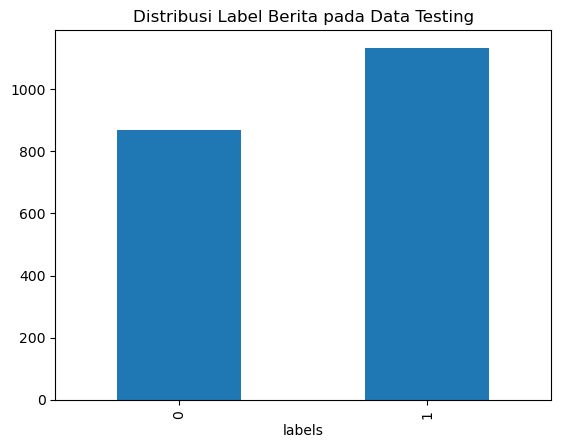

In [10]:
import matplotlib.pyplot as plt

df_train = pd.DataFrame(list(zip(x_train, y_train)), columns=['content_lemma', 'labels'])
df_train.groupby(['labels']).size().plot(kind='bar')
plt.title('Distribusi Label Berita pada Data Testing')
print(df_train.shape)

(500, 2)


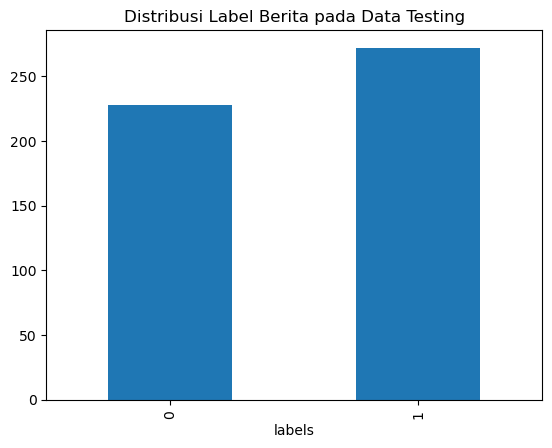

In [11]:
df_test = pd.DataFrame(list(zip(x_test, y_test)), columns=['content_lemma', 'labels'])
df_test.groupby(['labels']).size().plot(kind='bar')
plt.title('Distribusi Label Berita pada Data Testing')
print(df_test.shape)

# Word Embedding (roBERTa)

In [12]:
from transformers import RobertaTokenizer, TFRobertaModel

tokenizer = RobertaTokenizer.from_pretrained('cahya/roberta-base-indonesian-522M', do_lower_case=True)
indo_roberta = TFRobertaModel.from_pretrained('cahya/roberta-base-indonesian-522M', from_pt=True)

C:\Users\Asiyah\anaconda3\envs\asiyahnk\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Asiyah\anaconda3\envs\asiyahnk\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\Asiyah\anaconda3\envs\asiyahnk\lib\site-packages\transformers\modeling_tf_pytorch_utils.py:185: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for

In [13]:
import transformers
print(transformers.__version__)
#print(dir(transformers))

4.31.0


In [14]:
max_len = 257
def encode_texts(text_list):
   # Inisialisasi list untuk menampung hasil
    input_ids = []
    attention_masks = []

    for text in text_list:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,  # Tambahkan [CLS] dan [SEP]
            max_length=max_len,
            padding='max_length',
            truncation=True,  # Aktifkan pemotongan jika teks lebih panjang
            return_tensors='tf',  # Mengembalikan TensorFlow tensors
            return_attention_mask=True  # Menghasilkan attention mask
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    return {'input_ids': tf.concat(input_ids, axis=0), 'attention_mask': tf.concat(attention_masks, axis=0)}

In [15]:
# Encode data training dan testing
import tensorflow as tf

train_encodings = encode_texts(x_train)
test_encodings = encode_texts(x_test)

In [16]:
# build model fine tuning bert
# def get_embeddings(encoded_texts, batch_size=16):
#     outputs = indobert(encoded_texts['input_ids'], attention_mask=encoded_texts['attention_mask'])
#     return outputs.last_hidden_state  # Mengambil output embeddings

# Function to get embeddings with smaller batch size
def get_embeddings(encoded_texts, batch_size=16):
    embeddings = []
    for i in range(0, len(encoded_texts['input_ids']), batch_size):
        batch_input_ids = encoded_texts['input_ids'][i:i+batch_size]
        batch_attention_mask = encoded_texts['attention_mask'][i:i+batch_size]
        outputs = indo_roberta(batch_input_ids, attention_mask=batch_attention_mask)
        embeddings.append(outputs.last_hidden_state)
    return tf.concat(embeddings, axis=0)

# Mendapatkan embeddings untuk data training dan testing
train_embeddings = get_embeddings(train_encodings)
test_embeddings = get_embeddings(test_encodings)

In [17]:
from tensorflow.keras.layers import Input
# Input untuk token IDs dan attention mask
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

In [18]:
# Verifikasi tipe dan shape dari input_ids dan attention_mask
print(f"Type of input_ids: {type(input_ids)}")
print(f"Shape of input_ids: {input_ids.shape}")
print(f"Type of attention_mask: {type(attention_mask)}")
print(f"Shape of attention_mask: {attention_mask.shape}")

Type of input_ids: <class 'keras.engine.keras_tensor.KerasTensor'>
Shape of input_ids: (None, 257)
Type of attention_mask: <class 'keras.engine.keras_tensor.KerasTensor'>
Shape of attention_mask: (None, 257)


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from transformers import TFBertModel, BertTokenizer
from transformers.models.bert.modeling_bert import BertLayer

class roBertaLayer(Layer):
    def __init__(self, **kwargs):
        super(roBertaLayer, self).__init__(**kwargs)
        self.indobert = TFRobertaModel.from_pretrained('cahya/roberta-base-indonesian-522M', from_pt=True)

    def call(self, inputs):
        input_ids, attention_mask = inputs
        output = self.indobert(input_ids, attention_mask=attention_mask)
        return output.last_hidden_state

# Definisikan input Keras
input_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

# Gunakan BertLayer di dalam model Keras
roberta_output = roBertaLayer()([input_ids, attention_mask])

C:\Users\Asiyah\anaconda3\envs\asiyahnk\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
C:\Users\Asiyah\anaconda3\envs\asiyahnk\lib\site-packages\transformers\modeling_tf_pytorch_utils.py:185: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explici

In [21]:
import tensorflow as tf

out = tf.keras.layers.Conv1D(filters=16, kernel_size=2)(roberta_output)
out = tf.keras.layers.BatchNormalization()(roberta_output)
out = tf.keras.layers.Dropout(0.2)(out)
out = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))(out)
out = tf.keras.layers.GlobalMaxPooling1D()(out)
out = tf.keras.layers.Dropout(0.2)(out)
y = tf.keras.layers.Dense(2, activation="sigmoid")(out)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)
model.layers[2].trainable = True

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-05)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
metric = tf.keras.metrics.CategoricalAccuracy('balanced_accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 257)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 257)]        0           []                               
                                                                                                  
 ro_berta_layer (roBertaLayer)  (None, 257, 768)     125978112   ['input_ids[0][0]',              
                                                                  'attention_mask[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 257, 768)    3072        ['ro_berta_layer[0][0]']     

In [22]:
y_train_dl = tf.keras.utils.to_categorical(y_train)
y_test_dl = tf.keras.utils.to_categorical(y_test)

In [23]:
history = model.fit(x={'input_ids':train_encodings['input_ids'], 'attention_mask':train_encodings['attention_mask']},
                    y=y_train_dl,
                    validation_data=(
                        {'input_ids':test_encodings['input_ids'], 'attention_mask':test_encodings['attention_mask']},
                    y_test_dl),
                    epochs=10,
                    batch_size=8)
model.compile()

Epoch 1/10
251/251 [==============================] - 1651s 6s/step - loss: 0.3479 - balanced_accuracy: 0.8432 - val_loss: 0.4156 - val_balanced_accuracy: 0.8420
Epoch 2/10
251/251 [==============================] - 1642s 7s/step - loss: 0.2090 - balanced_accuracy: 0.9191 - val_loss: 0.3645 - val_balanced_accuracy: 0.8620
Epoch 3/10
251/251 [==============================] - 1646s 7s/step - loss: 0.1098 - balanced_accuracy: 0.9580 - val_loss: 0.1897 - val_balanced_accuracy: 0.9500
Epoch 4/10
251/251 [==============================] - 1640s 7s/step - loss: 0.0650 - balanced_accuracy: 0.9780 - val_loss: 0.2696 - val_balanced_accuracy: 0.9320
Epoch 5/10
251/251 [==============================] - 1632s 7s/step - loss: 0.0400 - balanced_accuracy: 0.9820 - val_loss: 0.2396 - val_balanced_accuracy: 0.9300
Epoch 6/10
251/251 [==============================] - 1627s 6s/step - loss: 0.0121 - balanced_accuracy: 0.9965 - val_loss: 0.2557 - val_balanced_accuracy: 0.9460
Epoch 7/10
251/251 [========

In [ ]:
# Prediction
from sklearn.metrics import classification_report

predicted_raw = model.predict(
    {'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']})

y_pred = np.argmax(predicted_raw, axis=1)
y_true = y_test_dl

# Periksa tipe data
print(f'y_true dtype: {y_true.dtype}, shape: {y_true.shape}')
print(f'y_pred dtype: {y_pred.dtype}, shape: {y_pred.shape}')

# Ubah y_true dari one-hot encoded ke label kelas
if y_true.ndim == 2:
    y_true = np.argmax(y_true, axis=1)

print(classification_report(y_true, y_pred))

# Ga dipakai

## View the output

In [ ]:
# print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
# print ("Number of batches:", len(hidden_states[0]))
# print ("Number of tokens:`", len(hidden_states[0][0]))
# print ("Number of hidden units:", len(hidden_states[0][0][0]))

## Combine tensor

In [ ]:
# token_embeddings = torch.stack(hidden_states, dim=0)
# token_embeddings.size()

## Swap dimensions, so we get tensors in format: [sentence, tokens, hidden layes, features]

In [ ]:
# token_embeddings = token_embeddings.permute(1,2,0,3)
# token_embeddings.size()

## We will use last four hidden layers to create each word embedding

In [ ]:
# processed_embeddings = token_embeddings[:, :, 9:, :]
# processed_embeddings.shape

In [ ]:
# embeddings_cpy = processed_embeddings.clone().detach()

## Convert data

### Check embedding size that used as an input for LSTM

In [ ]:
# size = (embeddings_cpy[0].size()[0],embeddings_cpy[0].size()[1],embeddings_cpy[0].size()[2])
# size

## Change embedding dimension to [sequnce_length, embedding_dim]

In [ ]:
# embeddings_cpy = embeddings_cpy.reshape(len(dataset), 50, 3072)

In [ ]:
# size = (embeddings_cpy[0].size()[0],embeddings_cpy[0].size()[1])
# size

## Convert torch tensor to numpy array

In [ ]:
# embed = embeddings_cpy.numpy()

## Helper function

In [ ]:
# # def train_test_split(x,y,train_percent):
# #     x = np.array(x).astype(np.float32)
# #     y = np.array(y)
# #     length = len(y)
# #     split = int(length * (train_percent/100))
# #     return (np.asarray(x[0:split]).astype(np.float32),
# #             np.asarray(y[0:split]).astype(np.float32),
# #             np.asarray(x[split:]).astype(np.float32),
# #             np.asarray(y[split:]).astype(np.float32)
# #         )
# from sklearn.model_selection import train_test_split

In [ ]:
# def combine_embedding_dataset(data1):
#     result = []
#     for d1 in zip(data1):
#         result.append([d1])
#     return np.array(result)

## Get labels from pandas dataframe

In [ ]:
# # Mendapatkan indeks kolom
# indeks_label_positif = dataset.columns.get_loc('label-positif')
# indeks_label_persuasif = dataset.columns.get_loc('label-persuasif')
# indeks_label_produk = dataset.columns.get_loc('label-produk')
# indeks_perspektif_tunggal = dataset.columns.get_loc('perspektif-tunggal')
# indeks_labels = dataset.columns.get_loc('labels')
# # Variabel target y adalah kombinasi dari empat label

# # label2 = dataset.iloc[:, [indeks_labels]].copy()
# # label2.head()
# y = dataset['labels'].values

In [ ]:
# len(y)

## Convert to numpy array

In [ ]:
#y = y.to_numpy()
#y

## Convert string labels to integer

In [ ]:
# y = y.astype(int)
# y

## Create dataset combined from two embedding

In [ ]:
# x = combine_embedding_dataset(embed)

## Split dataset

In [ ]:
# # x_train1,y_train,x_test1,y_test = train_test_split(embed1,y,80)
# # x_train1,x_test1,y_train,y_test = train_test_split(embed1, y, test_size=0.3, random_state=0)
# from sklearn.model_selection import KFold

# # kf = KFold(n_splits=4)           #KFold(n_splits=’warn’, shuffle=False, random_state=None)
# kf = KFold(5,shuffle=True, random_state=0) # Use for KFold classification

# for train_index, validation_index in kf.split(embed):
#    print("TRAIN:", embed[train_index], "VALIDATION:", embed[validation_index])
#    x_train, x_test = embed[train_index], embed[validation_index]
#    y_train, y_test = y[train_index], y[validation_index]

In [ ]:
# y_train.shape

In [ ]:
# y_test

## Create one hot encoding labels

In [ ]:
# y_train = tf.keras.utils.to_categorical(y_train, 2)
# y_test = tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
# embed.shape

In [ ]:
# size

# BiLSTM

In [ ]:
# from keras import Model
# from keras import Sequential
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# from keras.layers import Input, Embedding, Conv1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GlobalMaxPooling1D,concatenate,ConvLSTM1D
# from keras.layers import MaxPooling1D
# from keras.layers import Flatten
# from keras.layers import SpatialDropout1D
# import joblib

source code from https://github.com/hrshtv/Twitter-Sentiment-Analysis/blob/master/old/Keras-Simple-BiLSTM.ipynb

In [ ]:
# # Mendapatkan embeddings dari IndoRoBERTa
# roberta_output = indo_roberta(input_ids, attention_mask=attention_mask)
# sequence_output = roberta_output[0]  # Mengambil last_hidden_state

In [ ]:
# import tensorflow as tf

# out = tf.keras.layers.BatchNormalization()(sequence_output)
# out = tf.keras.layers.Dropout(0.2)(out)
# out = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))(out)
# out = tf.keras.layers.GlobalMaxPooling1D()(out)
# out = tf.keras.layers.Dropout(0.2)(out)
# y = tf.keras.layers.Dense(2, activation="sigmoid")(out)

# model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)
# model.layers[2].trainable = True

# optimizer = tf.keras.optimizers.Adam(learning_rate=2e-05)
# loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
# metric = tf.keras.metrics.CategoricalAccuracy('balanced_accuracy')

# model.compile(optimizer=optimizer, loss=loss, metrics=metric)
# model.summary()


In [ ]:
# import tensorflow as tf
# tf.keras.backend.clear_session()

# model = Sequential([
#     # Lapisan embedding yang mengonversi input integer menjadi vektor dense
#     Embedding(input_dim=257, output_dim=300, input_length=257, ),
#     BatchNormalization(),
#     Dropout(0.2),  # Tambahkan Dropout
#     # Lapisan BiLSTM
#     Bidirectional(LSTM(256, return_sequences=True)),
#     GlobalMaxPooling1D(),  # Tambahkan GlobalMaxPooling1D
#     # Opsional: Tambahkan dropout untuk regularisasi
#     Dropout(0.2),
#     # Lapisan Dense untuk klasifikasi
#     Dense(2, activation='sigmoid')  # '4' sesuai dengan jumlah label target Anda, sesuaikan jika berbeda
# ])

# # Ringkasan model
# model.summary()


In [ ]:
# y_train_dl = tf.keras.utils.to_categorical(y_train)
# y_test_dl = tf.keras.utils.to_categorical(y_test)

In [ ]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',  # Gunakan 'sparse_categorical_crossentropy' jika label adalah integer
#               metrics=['accuracy'])

In [ ]:
# history = model.fit(x=x_train, y=y_train, epochs=50, batch_size=128, validation_data=(x_test,y_test), verbose=1)
# save_path = '/content/drive/MyDrive/Colab Notebooks/Thesis Persuasive Detection at Paragraph-Level  /Embedding Models/model_roberta_bilstm.pkl'
# joblib.dump(model, save_path)
# score = model.evaluate(x_test, y_test,verbose=0)
# print("Accuracy: {}".format(score[1] * 100))

## Get Evaluate Score

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(y_true, y_pred,average='macro')
print('Precision : ',format(precision))
print('Recall    : ',format(recall))
print('F-score   : ',format(fscore))
print('Accuracy : ',accuracy_score(y_true, y_pred))

Precision :  0.9336221781155702
Recall    :  0.9333075335397316
F-score   :  0.9334610343784655
Accuracy :  0.934


In [25]:
# Prediction
from sklearn.metrics import classification_report

predicted_raw = model.predict(
    {'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask']})

y_pred = np.argmax(predicted_raw, axis=1)
y_true = y_test_dl

# Periksa tipe data
print(f'y_true dtype: {y_true.dtype}, shape: {y_true.shape}')
print(f'y_pred dtype: {y_pred.dtype}, shape: {y_pred.shape}')

# Ubah y_true dari one-hot encoded ke label kelas
if y_true.ndim == 2:
    y_true = np.argmax(y_true, axis=1)

print(classification_report(y_true, y_pred))


16/16 [==============================] - 62s 4s/step
y_true dtype: float32, shape: (500, 2)
y_pred dtype: int64, shape: (500,)
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       228
           1       0.94      0.94      0.94       272

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



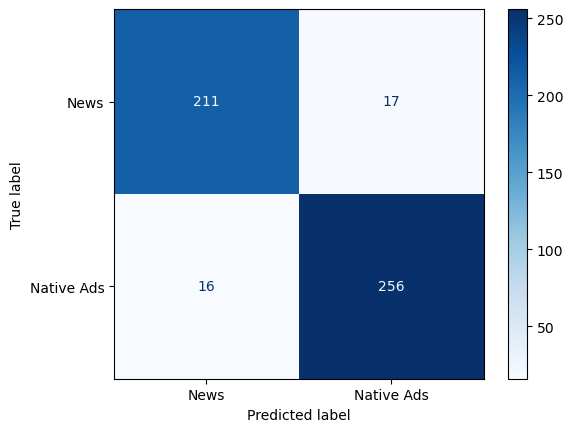

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["News", "Native Ads"]

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

## roc

C:\Users\Asiyah\anaconda3\envs\asiyahnk\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


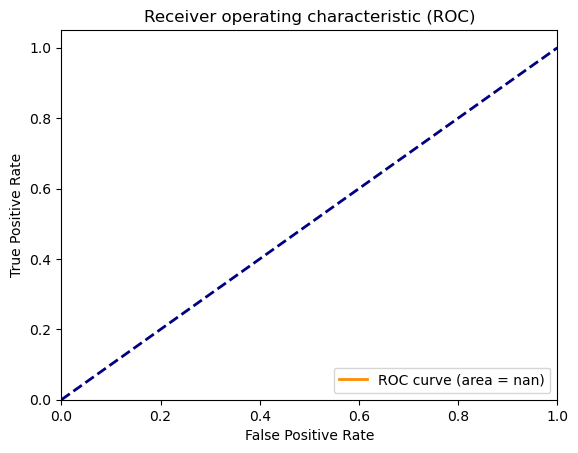

In [27]:
import numpy as np
from sklearn import metrics

y = np.array(y_true)

scores = np.array(y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=9)
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [28]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_true, y_pred)
auc_rf = auc(fpr_rf, tpr_rf)

In [29]:
auc_rf

0.9333075335397316

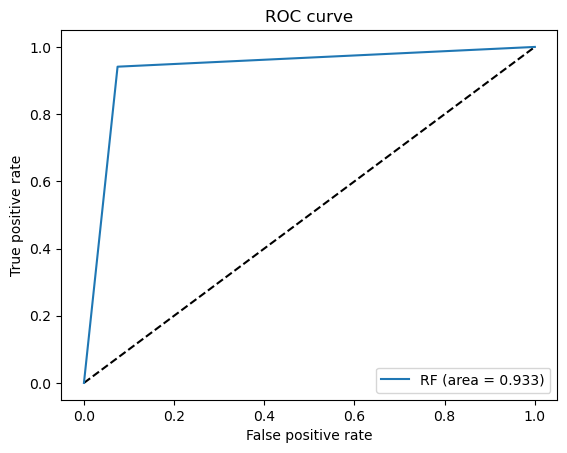

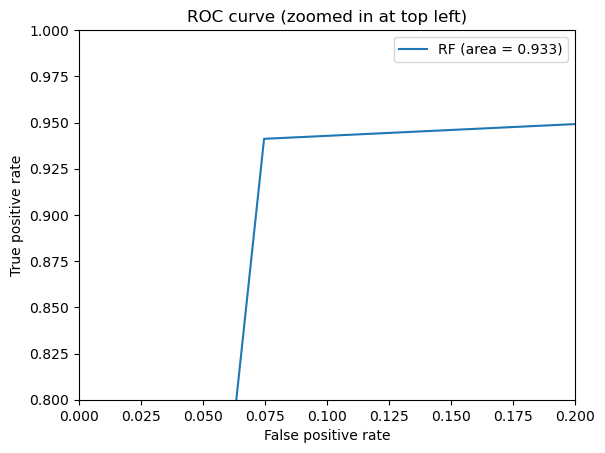

In [30]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [31]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve (y_true, y_pred)

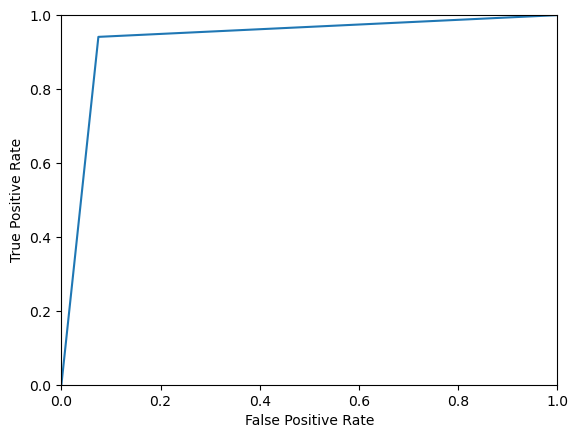

In [33]:
plot_roc_curve (fpr,tpr)

In [34]:
roc_auc_score(y_true, y_pred)

0.9333075335397316

0.9333075335397316


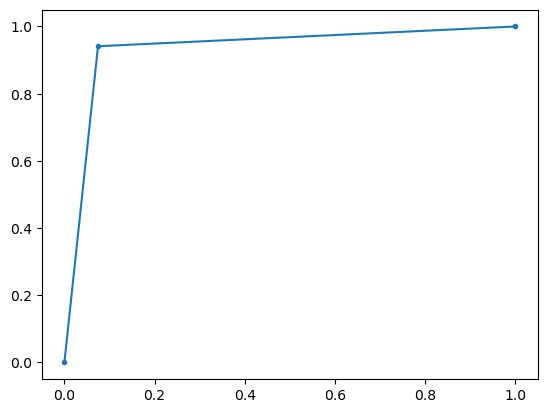

In [35]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_true, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
print(auc_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [36]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [37]:
perf_measure(y_true, y_pred)

(256, 17, 211, 16)

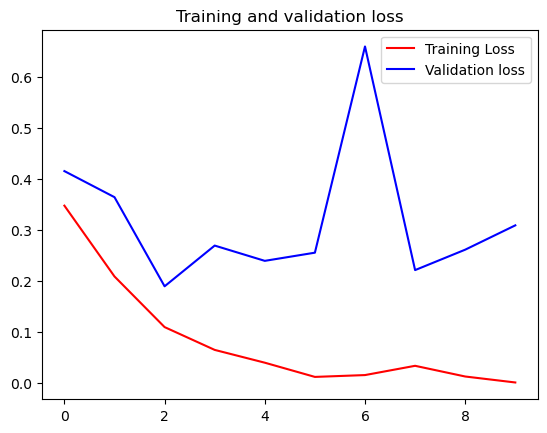

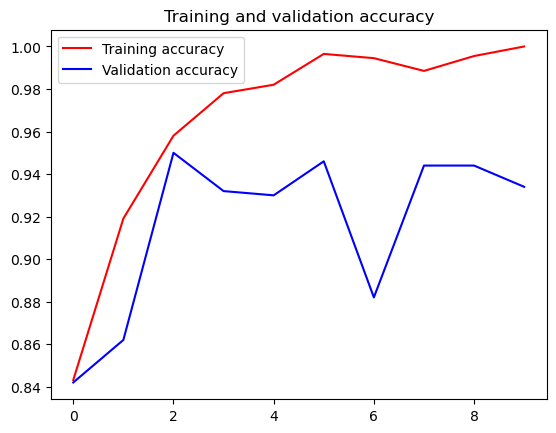

<Figure size 640x480 with 0 Axes>

In [38]:
acc = history.history['balanced_accuracy']
val_acc = history.history['val_balanced_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()